In [148]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score

In [68]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


| Column       | Meaning            | Type        |
| ------------ | ------------------ | ----------- |
| mpg          | Fuel efficiency    | Target      |
| cylinders    | Engine cylinders   | Numeric     |
| displacement | Engine size        | Numeric     |
| horsepower   | Engine power       | Numeric     |
| weight       | Car weight         | Numeric     |
| acceleration | 0–60 mph time (96.56064 kmph)     | Numeric     |
| model_year   | Manufacturing year | Numeric     |
| origin       | Region code        | Categorical |
| name         | Car model name     | Text        |
| kmpl         | Fuel efficiency    | Target      |


In [69]:
# KMPL=MPG×0.425144
df['kmpl'] = df['mpg'] * 0.425144

In [70]:
df.drop(['mpg'],axis=1, inplace=True)

In [71]:
df.sample(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kmpl
50,4,116.0,90.0,2123,14.0,71,europe,opel 1900,11.904032
149,4,120.0,97.0,2489,15.0,74,japan,honda civic,10.203456
316,6,225.0,90.0,3381,18.7,80,usa,dodge aspen,8.120250
9,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,6.377160
344,4,86.0,64.0,1875,16.4,81,usa,plymouth champ,16.580616


In [72]:
df.shape

(398, 9)

In [73]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    str    
 7   name          398 non-null    str    
 8   kmpl          398 non-null    float64
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [74]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
kmpl            0
dtype: int64

In [75]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kmpl
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,9.997080
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,3.322919
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.826296
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,7.440020
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,9.778312
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,12.329176
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,19.811710


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.dropna(inplace=True)

In [78]:
df.corr(numeric_only=True)['kmpl']

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
kmpl            1.000000
Name: kmpl, dtype: float64

In [79]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kmpl
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.652592
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.377160
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.652592
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.802304
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.227448


<Axes: xlabel='origin'>

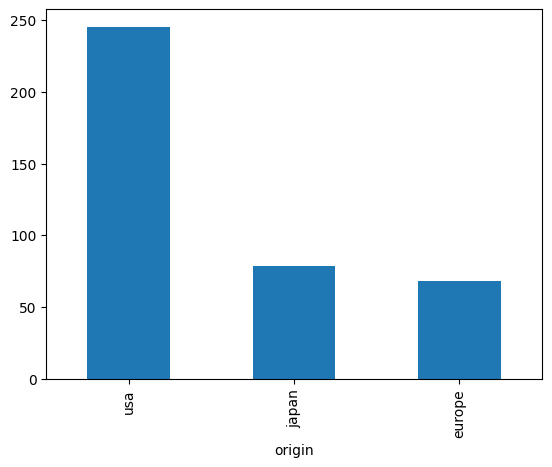

In [80]:
df['origin'].value_counts().plot(kind='bar')

<Axes: >

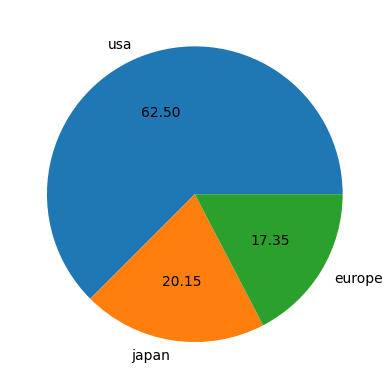

In [81]:
df['origin'].value_counts().plot(kind='pie', autopct="%.2f")

<Axes: xlabel='cylinders'>

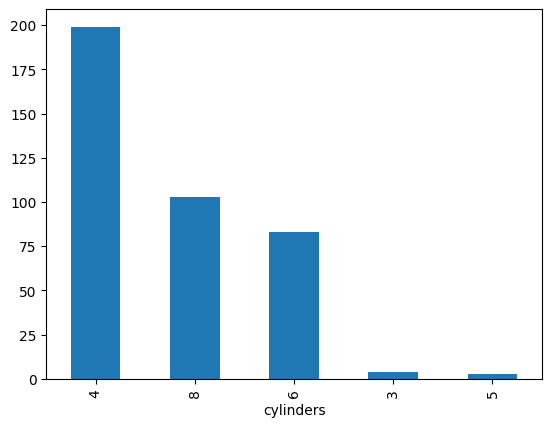

In [82]:
df['cylinders'].value_counts().plot(kind='bar')

<Axes: >

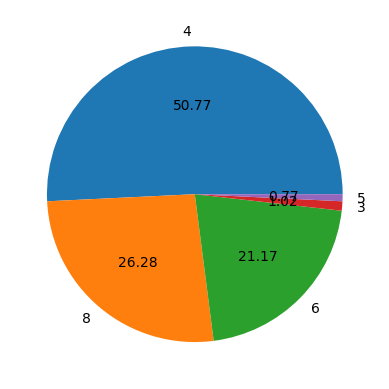

In [83]:
df['cylinders'].value_counts().plot(kind='pie', autopct="%.2f")

<Axes: ylabel='Frequency'>

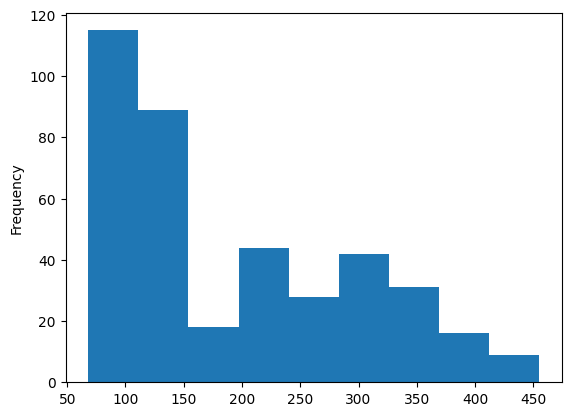

In [84]:
df['displacement'].plot(kind='hist',bins=9)

<Axes: >

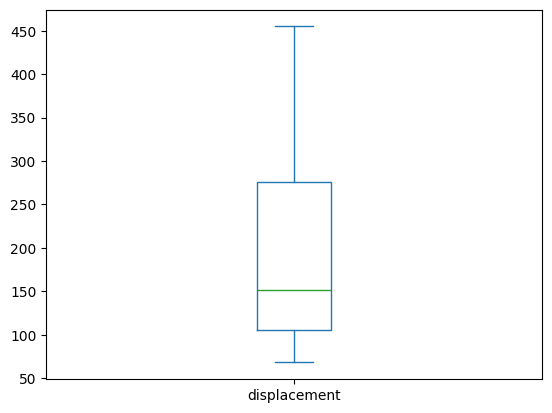

In [85]:
df['displacement'].plot(kind='box')

/tmp/ipykernel_13858/2276503915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement'])


<Axes: xlabel='displacement', ylabel='Density'>

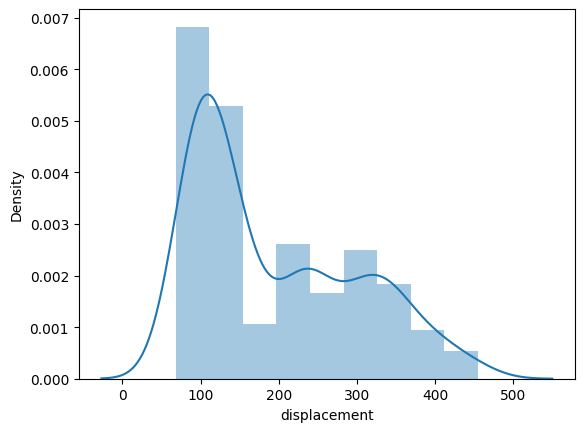

In [86]:
sns.distplot(df['displacement'])

<Axes: ylabel='Frequency'>

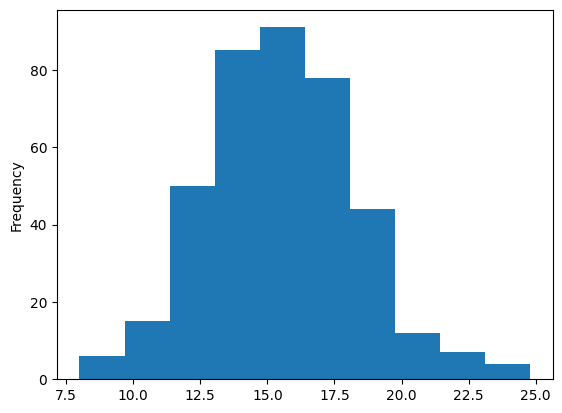

In [87]:
df['acceleration'].plot(kind="hist")

/tmp/ipykernel_13858/2835763743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['acceleration'])


<Axes: xlabel='acceleration', ylabel='Density'>

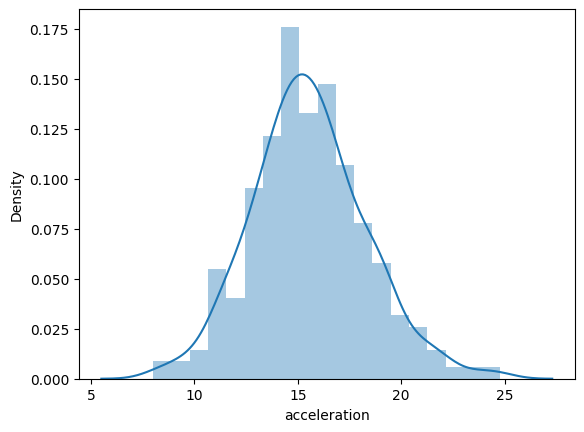

In [88]:
sns.distplot(df['acceleration'])

<Axes: >

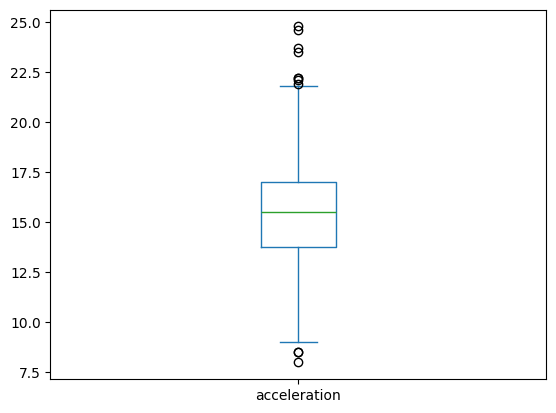

In [89]:
df['acceleration'].plot(kind='box')

In [90]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kmpl
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,7.652592
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.377160
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,7.652592
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.802304
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,7.227448


In [91]:
y = df.iloc[:,-1]
df = df.iloc[:,:4]

In [92]:
df.head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130.0,3504
1,8,350.0,165.0,3693
2,8,318.0,150.0,3436
3,8,304.0,150.0,3433
4,8,302.0,140.0,3449


In [93]:
y

0       7.652592
1       6.377160
2       7.652592
3       6.802304
4       7.227448
         ...    
393    11.478888
394    18.706336
395    13.604608
396    11.904032
397    13.179464
Name: kmpl, Length: 392, dtype: float64

## Linear regerssion

In [104]:
(type(df),df.shape)

(pandas.DataFrame, (392, 4))

In [105]:
(type(y), y.shape)

(pandas.Series, (392,))

In [113]:
lr = LinearRegression()

xtrain,xtest,ytrain,ytest = train_test_split(df,y,train_size=0.2,random_state=42)

In [114]:
lr.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# Beta0
lr.intercept_

np.float64(19.465880016013603)

In [ ]:
# beta1...4
lr.coef_

array([ 0.13840469, -0.00578515, -0.0175795 , -0.00242555])

## Custom Linear Regerssion class

In [142]:
class MLR:
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self,xtrain,ytrain):
        xtrain = np.insert(xtrain,0,1,axis=1)

        beta = np.linalg.inv((xtrain.T).dot(xtrain)).dot(xtrain.T).dot(ytrain)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self,xtest):
        return xtest.dot(self.coef_) + self.intercept_

In [143]:
ob = MLR()
ob.fit(xtrain,ytrain)

In [144]:
ob.coef_

array([ 0.13840469, -0.00578515, -0.0175795 , -0.00242555])

In [145]:
ob.intercept_

np.float64(19.465880016013763)

In [147]:
ypred = ob.predict(xtest)

In [149]:
r2_score(ytest,ypred)

0.6860986698366632

In [150]:
ypred_builtin = lr.predict(xtest)
r2_score(ytest,ypred_builtin)

0.6860986698366567

In [151]:
xtest.shape

(314, 4)